In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import os

In [2]:
## Read in data from loops

directory_path = r'C:\Users\mrpro\Documents\Code\CBI\Corrected_Data_Official\nesscanResult_removedBadNesdisRecords\BobHall'
dataframes = []


for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('.csv'):

        file_path = os.path.join(directory_path, filename)
        
        df = pd.read_csv(
        file_path,
        parse_dates=[0],
        na_values=[-999, -99, 99, 'NA', 'RM'],
        engine='python'   
        )
        df.columns = ['station #','date', 'pwl',]
        dataframes.append(df)

bhp = pd.concat(dataframes, ignore_index=True)

directory_path = r'C:\Users\mrpro\Documents\Code\CBI\data 2\NOAA\bobHallPier'
dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

bhp_NOAA = pd.concat(dataframes, ignore_index=True)
bhp_NOAA.drop(labels=range(0,3), axis=0, inplace=True)
bhp_NOAA.drop(labels=range(2304169,2304171), axis=0, inplace=True)

#bhp.drop(labels=range(0,467717),axis=0,inplace=True)
#bhp.reset_index(drop=True,inplace=True)
#bhp_NOAA.reset_index(drop=True,inplace=True)
bhp['date'] = pd.to_datetime(bhp['date'])
bhp_NOAA['date'] = pd.to_datetime(bhp_NOAA['Date Time'])

bhp = bhp.merge(bhp_NOAA,on='date',how='outer')



In [3]:
bhp['offset'] = bhp['pwl'] - bhp[' Water Level']

In [4]:
bhp['offset'] = bhp['pwl'] - bhp[' Water Level']
bhp = bhp.drop(columns='Date Time', axis= 0)
bhp = bhp.drop(columns=' Sigma', axis= 0)
bhp = bhp.drop(columns=' O or I (for verified)', axis= 0)
bhp = bhp.drop(columns=' F', axis= 0)
bhp = bhp.drop(columns=' R', axis= 0)
bhp = bhp.drop(columns=' L', axis= 0)
bhp = bhp.drop(columns=' Quality ', axis= 0)

In [5]:

df = pd.DataFrame({
    'values': bhp['offset'],
    'date': bhp['date']
})

# Convert column to numpy array
offset_list = df['values'].to_numpy()
date_list = df['date'].to_numpy()  # Extract dates as numpy array

def consecutive_runs_info(arr):
    if len(arr) == 0:
        return []

    runs = []
    
    def same_value(a, b):
        return (np.isnan(a) and np.isnan(b)) or (a == b)

    start_idx = 0
    current_val = arr[0]

    for i in range(1, len(arr)):
        if not same_value(arr[i], current_val):
            runs.append((start_idx, i, current_val, i - start_idx))
            start_idx = i
            current_val = arr[i]

    runs.append((start_idx, len(arr), current_val, len(arr) - start_idx))
    return runs

arr = offset_list
arr_rounded = np.round(arr, 3)  # Round values for stability
info = consecutive_runs_info(arr_rounded)

# Filter results and add start/end dates
filtered_info = []
for (start_idx, end_idx, val, length) in info:
    if not np.isnan(val) and val != 0 and length >= 10:
        start_date = date_list[start_idx]  # Get start date
        end_date = date_list[end_idx - 1]  # Get end date (exclusive index)
        filtered_info.append((start_idx, end_idx, val, length, start_date, end_date))

# Convert to DataFrame and copy to clipboard
df_filtered = pd.DataFrame(filtered_info, columns=['Start Index', 'End Index', 'Value', 'Length', 'Start Date', 'End Date'])
df_filtered.to_clipboard(index=False)

print(df_filtered)


    Start Index  End Index  Value  Length          Start Date  \
0        617724     617738 -0.001      14 1997-09-16 19:36:00   
1        617742     617788 -0.001      46 1997-09-16 21:24:00   
2       1009038    1009054 -0.001      16 2002-03-02 15:30:00   
3       1148445    1148457  0.011      12 2003-10-03 13:54:00   
4       1148458    1155246  0.011    6788 2003-10-03 15:12:00   
5       1228485    1228624  0.006     139 2004-09-01 00:00:00   
6       1228634    1228648  0.006      14 2004-09-01 14:54:00   
7       1229154    1229168  0.006      14 2004-09-03 16:54:00   
8       1395084    1395094  0.002      10 2006-07-26 12:54:00   
9       1892116    1892153 -0.005      37 2012-03-26 16:48:00   
10      1892153    1892388  0.002     235 2012-03-26 20:30:00   
11      1892391    1892404 -0.005      13 2012-03-27 20:18:00   
12      1892414    1894103 -0.005    1689 2012-03-27 22:36:00   
13      1894105    1895038 -0.005     933 2012-04-03 23:42:00   
14      1895040    189510

In [6]:
bhp[2156365:2156370]

,station #,date,pwl,Water Level,offset
2156365,014,2015-04-01 17:36:00,6.564,6.564,0.0
2156366,014,2015-04-01 17:42:00,6.598,6.598,0.0
2156367,014,2015-04-01 17:48:00,6.591,6.591,0.0
2156368,014,2015-04-01 17:54:00,6.624,6.624,0.0
2156369,014,2015-04-01 18:00:00,6.608,6.608,0.0


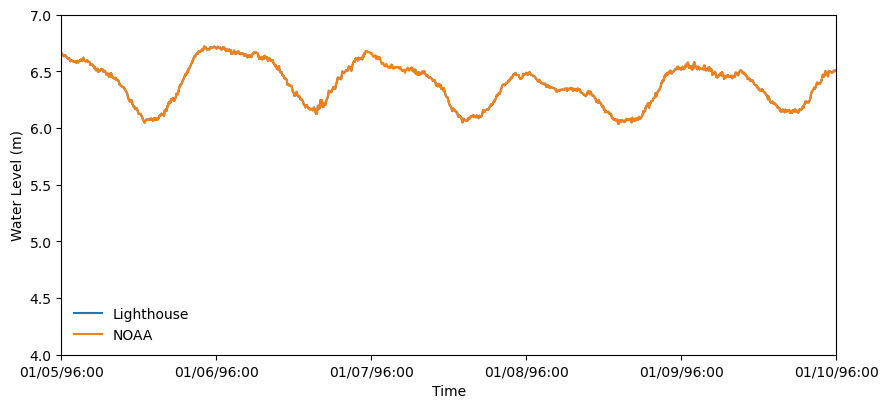

In [5]:

start_date = pd.to_datetime('1996-01-05 00:00')
end_date = pd.to_datetime('1996-01-10 00:00')

# Filter the data to only include the xlim range
filtered_data = bhp[(bhp['date'] >= start_date) & (bhp['date'] <= end_date)]

# Plot the filtered data
plt.figure(figsize=(10,5))
plt.plot(filtered_data['date'], filtered_data['pwl'], label='Lighthouse')
plt.plot(filtered_data['date'], filtered_data[' Water Level'], label='NOAA')


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H'))

# Set tick locator for hourly intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
# Autofmt the x-axis labels
plt.gcf().autofmt_xdate()

plt.xticks(rotation=0)

for label in plt.gca().get_xticklabels():
    label.set_ha('center')  # Set horizontal alignment to center

# Adjust y-axis limits
plt.ylim(4, 7)

# Set x-axis limits
plt.xlim(start_date, end_date)

# Add legend and title
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Water Level (m)')

# Display the plot
plt.show()

In [6]:
offset = pd.DataFrame()
offset['values'] = bhp['offset']
offset['date'] = bhp['date']
offset.replace(0, pd.NA, inplace=True)
offset = offset.dropna()
offset['change'] = (offset['values'] != offset['values'].shift()).cumsum()

result = offset.groupby('change').agg(
    start_index=('change', 'idxmin'),
    end_index=('change', 'idxmax'),
    length=('values', 'size'),
    value=('values', 'first')
).reset_index(drop=True)

# Drop the helper column if necessary
offset = offset.drop(columns=['change'])

result = result[result['length']>=10]

result.to_clipboard()

In [8]:
offset

,values,date
476776,0.012,1996-02-07 17:48:00
476777,-0.039,1996-02-07 17:54:00
508969,-3.984,1996-06-20 21:00:00
508970,-3.986,1996-06-20 21:06:00
508971,-3.986,1996-06-20 21:12:00
...,...,...
2622421,-0.004,2020-07-25 14:54:00
2622422,-0.021,2020-07-25 15:00:00
2622432,0.074,2020-07-25 16:00:00
2622477,0.099,2020-07-25 20:30:00


In [10]:
bhp[2232352:2237465]

,station #,date,pwl,Water Level,offset
2232352,014,2016-02-12 08:18:00,6.466,6.464,0.002
2232353,014,2016-02-12 08:24:00,6.474,6.472,0.002
2232354,014,2016-02-12 08:30:00,6.474,6.472,0.002
2232355,014,2016-02-12 08:36:00,6.473,6.471,0.002
2232356,014,2016-02-12 08:42:00,6.468,6.466,0.002
...,...,...,...,...,...
2237460,014,2016-03-04 15:06:00,6.623,6.621,0.002
2237461,014,2016-03-04 15:12:00,6.636,6.634,0.002
2237462,014,2016-03-04 15:18:00,6.613,6.611,0.002
2237463,014,2016-03-04 15:24:00,6.627,6.625,0.002


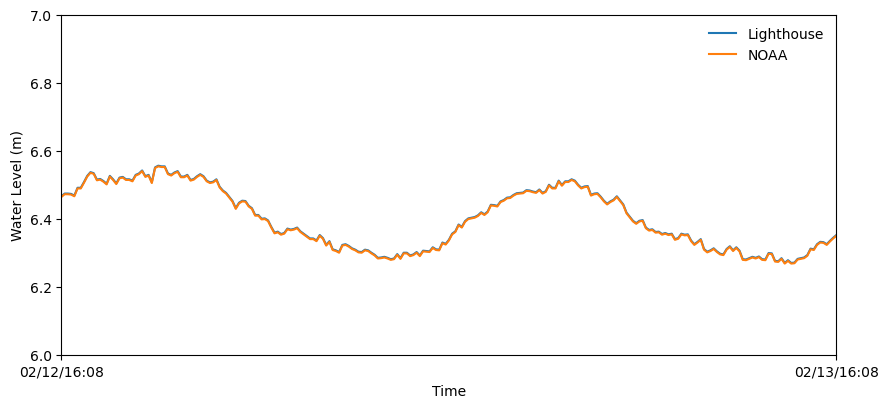

In [11]:

start_date = pd.to_datetime('2016-02-12 08:18:00')
end_date = pd.to_datetime('2016-02-13 08:18:00')

# Filter the data to only include the xlim range
filtered_data = bhp[(bhp['date'] >= start_date) & (bhp['date'] <= end_date)]

# Plot the filtered data
plt.figure(figsize=(10,5))
plt.plot(filtered_data['date'], filtered_data['pwl'], label='Lighthouse')
plt.plot(filtered_data['date'], filtered_data[' Water Level'], label='NOAA')


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H'))

# Set tick locator for hourly intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
# Autofmt the x-axis labels
plt.gcf().autofmt_xdate()

plt.xticks(rotation=0)

for label in plt.gca().get_xticklabels():
    label.set_ha('center')  # Set horizontal alignment to center

# Adjust y-axis limits
plt.ylim(6, 7)

# Set x-axis limits
plt.xlim(start_date, end_date)

# Add legend and title
plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Water Level (m)')

# Display the plot
plt.show()